In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns


In [7]:
#load and preview data
df = pd.read_csv('Mall_Customers.csv')
print(df.info())
print(df.head())

#check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
CustomerID                0
Gender                 

In [8]:
#data preprocesing
#drop CustomerID column
df = df.drop(['CustomerID'], axis=1)

#convert Gender to numeric
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

#normalize the data for better clustering and apply scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

In [3]:
import os
os.environ['OMP_NUM_THREADS'] = '1'  # Set OpenMP threads to 1
os.environ['MKL_NUM_THREADS'] = '1'  # Set MKL threads to 1


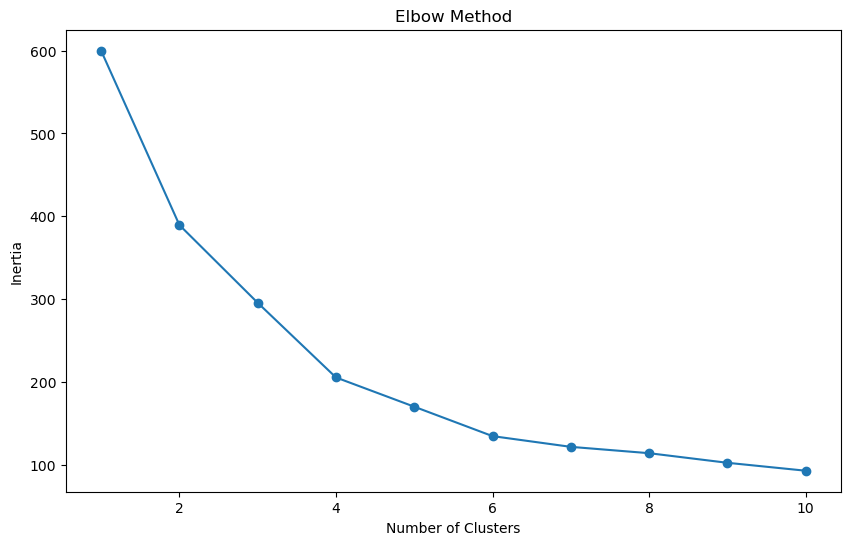

In [13]:
#elbow method to find optimal K
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

#plot
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()




In [10]:
#assuming the optimal K is 5 based on the elbow graph
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

#preview updated df
print(df.head())


   Gender  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0       1   19                  15                      39        2
1       1   21                  15                      81        2
2       0   20                  16                       6        3
3       0   23                  16                      77        2
4       0   31                  17                      40        2


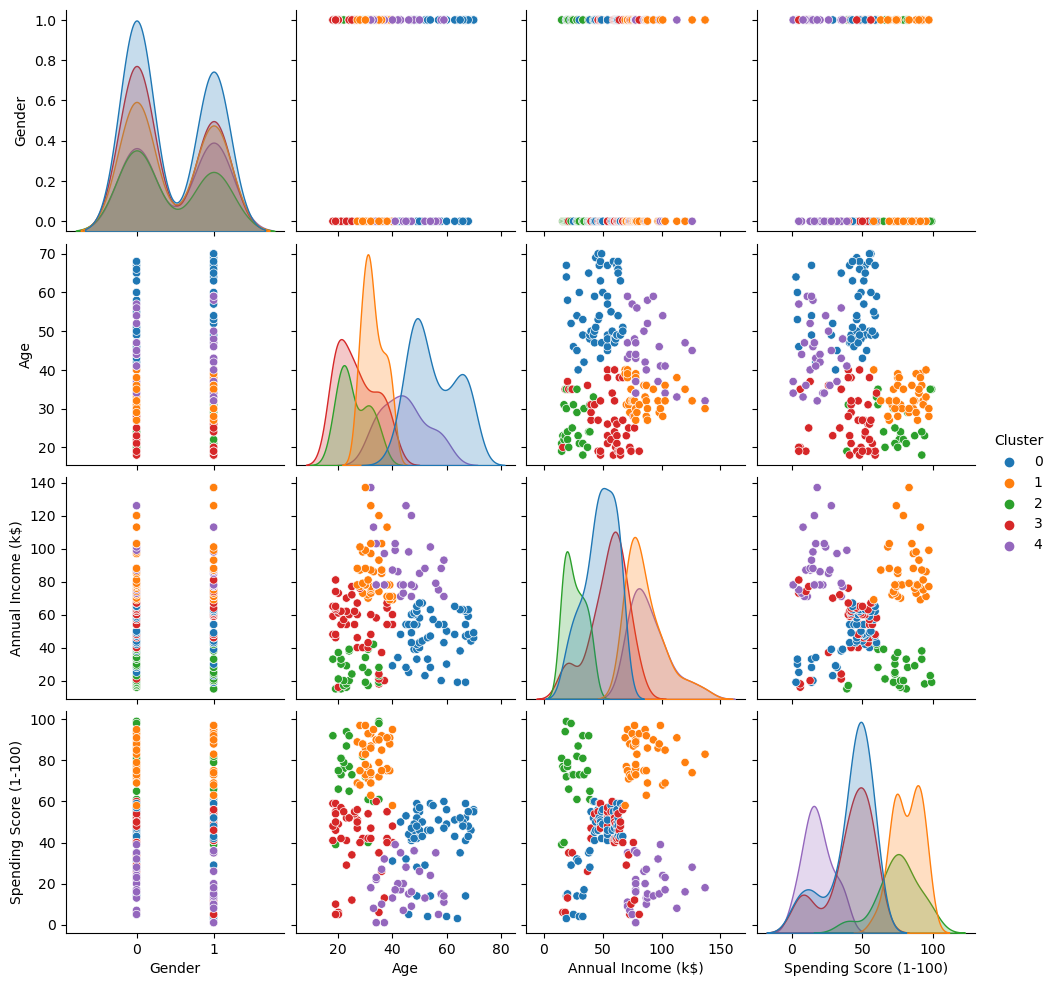

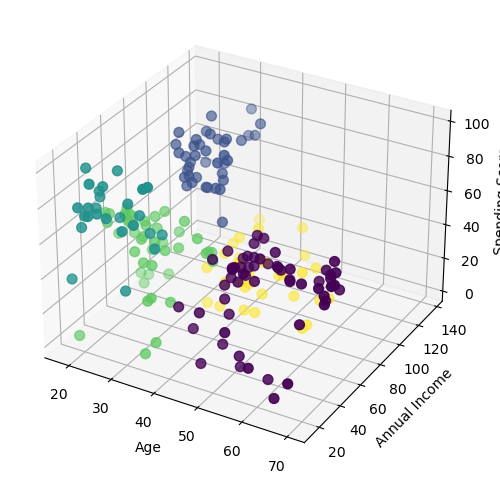

In [12]:
#visualize clusters with pairplot
sns.pairplot(df, hue='Cluster', palette='tab10')
plt.show()

# Alternatively, 3D Plot with 'Annual Income' and 'Spending Score'
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], s=50, cmap='viridis')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.show()


In [14]:
#analyze cluster statistics
cluster_analysis = df.groupby('Cluster').mean()
print(cluster_analysis)

           Gender        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                 
0        0.431034  55.275862           47.620690               41.706897
1        0.450000  32.875000           86.100000               81.525000
2        0.423077  25.769231           26.115385               74.846154
3        0.400000  26.733333           54.311111               40.911111
4        0.516129  44.387097           89.774194               18.483871


In [15]:
#export to CSV for use in Tableau
df.to_csv('Mall_Customers_with_Clusters.csv', index=False)